# Keras pre-trained model and its uses

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

In [2]:
model = ResNet50(weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
img_path = 'elephant.jpg'

In [6]:
img = image.load_img(img_path, target_size=(224, 224))

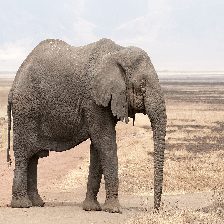

In [7]:
img

In [8]:
img_array = image.img_to_array(img)

In [9]:
img_array.shape

(224, 224, 3)

In [10]:
img_tensor = np.expand_dims(img_array, axis=0)

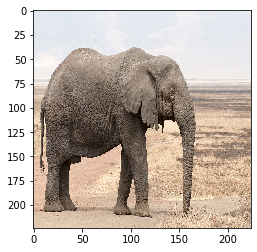

In [12]:
import matplotlib.pyplot as plt
plt.imshow(np.uint8(img_tensor[0]));

In [13]:
x = preprocess_input(img_tensor)

In [14]:
preds = model.predict(x)

In [15]:
preds.shape

(1, 1000)

In [16]:
from tensorflow.keras.applications.resnet50 import decode_predictions as dpred

In [17]:
dpred(preds, top=3)[0]

40960/35363 [==================================] - 0s 4us/step


[('n02504458', 'African_elephant', 0.7057219),
 ('n02504013', 'Indian_elephant', 0.13928437),
 ('n01871265', 'tusker', 0.13739593)]

## Feature extraction from pre-trained model

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [20]:
print(features)

[[[[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.         47.131554   ...  0.          0.
     0.        ]
   ...
   [ 0.          0.         27.666393   ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0

***